## load Dependancies

In [2]:
## Load packages and dependancies ##
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle

## Data Preprocessing

In [3]:
## Utility Functions ##

# obtain training data function
def create_training_data():
    
    faceCascade = cv2.CascadeClassifier('../haarcascade_face.xml')

    # Loop through training class folders
    for category in Classes:

        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # Class Labels

        # Loop through images in each folder
        for img in os.listdir(path):

            # Add images to training set with correct labels
            try:
                img_path = os.path.join(path, img)
                # print(img_path)
                img_array = cv2.imread(img_path)
                gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                faces = faceCascade.detectMultiScale(gray, 1.1, 5)                    
                
                x = faces[0][0]
                y = faces[0][1]
                w = faces[0][2]
                h = faces[0][3]
                roi_color = img_array[y:y+h, x:x+w]

                # apply the necessary transformations
                img_size = 224
                new_array = cv2.resize(roi_color, (img_size, img_size))
                training_Data.append([new_array, class_num])

            except Exception as e:
                print('Failed to Grab Image')
                pass

In [4]:
## Data Pre-Processing ##

# data Directory
Datadirectory = "Dataset/"

# Define labels
Classes = ["Person", "Not_Person"]

# Coverting to image size that is required by ImageNet (224 x 224)
img_size = 224

# Training data
training_Data = []

# Load training data
create_training_data()

# shuffle the training data
random.shuffle(training_Data)

# Convert to Array
X = [] # Features
y = [] # label

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
# Convert to Numpy Array
X = np.array(X).reshape(-1, img_size, img_size, 3)
Y = np.array(y)
    
# Normalize the features
X = X/255

Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Grab Image
Failed to Gra

## Training

In [23]:
## Begin Training With The 

# Transfer Learning - Load lightweight pre-trained DL model
model = tf.keras.applications.mobilenet.MobileNet()
# model.summary()

# Obtain transfer model layer input and output
base_input = model.layers[0].input
base_ouput = model.layers[-4].output

# Modify transfer model's last layer
Flat_layer = layers.Flatten()(base_ouput)
final_output = layers.Dense(1)(Flat_layer)
# Add sigmoid since this is a binary classification
final_output = layers.Activation('sigmoid')(final_output)

# Create the revised model
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

# Set up the model
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [24]:
# Fit the model to the data
epochs = 12
new_model.fit(X, Y, epochs = epochs, validation_split = 0.1)

# Save Our Model
new_model.save("../Person_Without_Mask_Detection.h5")

Epoch 1/12
19/19 [==============================] - 47s 2s/step - loss: 0.2325 - accuracy: 0.8691 - val_loss: 0.4157 - val_accuracy: 0.9701
Epoch 2/12
19/19 [==============================] - 42s 2s/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0328 - val_accuracy: 0.9851
Epoch 3/12
19/19 [==============================] - 41s 2s/step - loss: 0.2467 - accuracy: 0.9609 - val_loss: 10.3317 - val_accuracy: 0.1045
Epoch 4/12
19/19 [==============================] - 40s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 8.4103 - val_accuracy: 0.2388
Epoch 5/12
19/19 [==============================] - 41s 2s/step - loss: 3.3046e-04 - accuracy: 1.0000 - val_loss: 7.6807 - val_accuracy: 0.2836
Epoch 6/12
19/19 [==============================] - 40s 2s/step - loss: 6.4277e-05 - accuracy: 1.0000 - val_loss: 4.3824 - val_accuracy: 0.5373
Epoch 7/12
19/19 [==============================] - 40s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3822 - val_accuracy: 0.8358
Epoch 8/12


## Testing

In [5]:
new_model = keras.models.load_model('../Person_Without_Mask_Detection.h5')

In [8]:
# Function for applying transformations
def apply_image_trans(img):
    img_size = 224
    faceCascade = cv2.CascadeClassifier('../haarcascade_face.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 5)                    

    x = faces[0][0]
    y = faces[0][1]
    w = faces[0][2]
    h = faces[0][3]
    roi_color = img[y:y+h, x:x+w]    
    
    final_image = cv2.resize(roi_color, (img_size, img_size))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    return final_image

# Function for interpreting the sigmoid output
def convert_sigmoid_output(sigmoid):
    if(sigmoid < 0.50):
        print('\nThis person is Recognized!\n')
    elif(sigmoid > 0.50):
        print('\nThis person is not Recognized!\n')
    else:
        print('\nNot Sure!\n')


This person is Recognized!



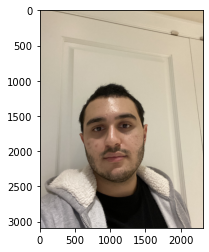

In [9]:
# Recognized test 1
frame = cv2.imread('./Dataset/Test_Images/Kaveh_1.jpeg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# apply transformations to the picture 
final_image = apply_image_trans(frame)

# this is the sigmoid output
Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)


This person is Recognized!



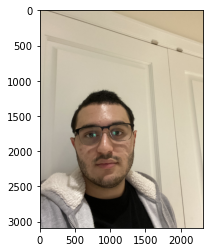

In [10]:
# Recognized test 2
frame = cv2.imread('./Dataset/Test_Images/Kaveh_2.jpeg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# apply transformations to the picture 
final_image = apply_image_trans(frame)

# this is the sigmoid output
Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)


This person is not Recognized!



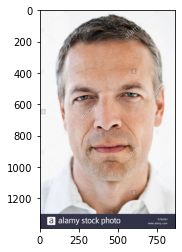

In [11]:
# Not recognized test 1
frame = cv2.imread('./Dataset/Test_Images/Not_Kaveh_1.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# apply transformations to the picture 
final_image = apply_image_trans(frame)

# this is the sigmoid output
Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)